<div align = "center"><h1>CSC 113 Project</h1></div>
<div align = "center"><h3>By: Ayan Das, Adeeb Ahmed, Nasif Rahman</h3></div>

<b>Project: Word Count</b>

Requirements:
- Report Word Frequent Analysis in a text file
- Report the word-count time using multiple threads/processes from 1-8

In [4]:
#The following shows all the neccessary libraries

import threading   #library to implement threading

import multiprocessing   #library to implement multiprocessing

from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor  #additional libraries for threading and processing 

import numpy as np    #Programming library for mathematical calculation

import time    #library to represent time in coded format, used to calculate execution time per thread

import matplotlib.pyplot as plt   #library used for data visualization, will graph execution time

import glob   #used to check for patterns in file paths and return the pattern

from PIL import Image

import pandas as pd   #used for data manipulation and analysis, basic scientific helper library

import random   #can be used to generate random numbers, usually pseudo random

import string   #for extension of string capabillities with added functions

import re   #we will rely on this library to check for matching words when calculating word frequency

#to handle the output of dictionary without raising error from missing key values
from collections import defaultdict

import os

from itertools import islice  #we will use this library to split the dictionary in various parts

- First, we will focus on the first requirement, reporting word frequent analysis in a text file

In [1]:
#Import a text file and read it as a string
#note: encoding needs to be specified otherwise it will cause an error
with open('MemorialsOfOldDurham.txt', 'r', encoding = "utf-8") as file:   #a simpler way of opening a file, 'r' stands for read
    data = file.read().replace('\n', '')  #remove all instances where a newline occurs

Now that we have opened the text file and saved it as a string variable within 'data', let us see how it looks like.

In [3]:
print(data)   #we have successfully converted our text file into a readable string variable

The Project Gutenberg eBook of Memorials of old Durham, by Henry R.LeightonThis eBook is for the use of anyone anywhere in the United States andmost other parts of the world at no cost and with almost no restrictionswhatsoever. You may copy it, give it away or re-use it under the termsof the Project Gutenberg License included with this eBook or online atwww.gutenberg.org. If you are not located in the United States, youwill have to check the laws of the country where you are located beforeusing this eBook.Title: Memorials of old DurhamEditor: Henry R. LeightonRelease Date: October 1, 2022 [eBook #69079]Language: EnglishProduced by: Tim Lindell, Chuck Greif and the Online Distributed             Proofreading Team at https://www.pgdp.net (This file was             produced from images generously made available by The             Internet Archive/Canadian Libraries)*** START OF THE PROJECT GUTENBERG EBOOK MEMORIALS OF OLD DURHAM ***                 MEMORIALS OF THE COUNTIES OF ENGLAND    

In [ ]:
#we can verify the datatype of data variable
type(data)  #output: str --> verifies that it's a string

str

In [8]:
#We will now use defaultdict to calculate the word frequency
counts = defaultdict(int)   #accepts integer as a parameter
def wordFrequency(wordCount):  #it accepts a dictionary as a paramter
    for word in re.findall('\w+', data): #\W+ is the opposite of \w ; with the + it means one or more non-alphanumeric characters.
        wordCount[word] += 1   #here the words serves as keys and the values represent the number of times they appear
                            #for each instances the key appears, it's value counter increments
    #return the dictionary
    return dict(wordCount)   #converts count to dictionary and returns it when we call the function wordFrequency()

In [9]:
#test the function
wordFrequency(counts)

{'The': 783,
 'Project': 65,
 'Gutenberg': 69,
 'eBook': 11,
 'of': 4161,
 'Memorials': 14,
 'old': 134,
 'Durham': 342,
 'by': 631,
 'Henry': 47,
 'R': 32,
 'LeightonThis': 1,
 'is': 1000,
 'for': 403,
 'the': 6235,
 'use': 22,
 'anyone': 8,
 'anywhere': 2,
 'in': 1695,
 'United': 11,
 'States': 13,
 'andmost': 1,
 'other': 129,
 'parts': 22,
 'world': 12,
 'at': 504,
 'no': 102,
 'cost': 9,
 'and': 2400,
 'with': 536,
 'almost': 22,
 'restrictionswhatsoever': 1,
 'You': 23,
 'may': 119,
 'copy': 15,
 'it': 474,
 'give': 23,
 'away': 30,
 'or': 359,
 're': 5,
 'under': 67,
 'termsof': 1,
 'License': 9,
 'included': 12,
 'this': 267,
 'online': 4,
 'atwww': 3,
 'gutenberg': 9,
 'org': 7,
 'If': 70,
 'you': 156,
 'are': 421,
 'not': 247,
 'located': 10,
 'youwill': 3,
 'have': 281,
 'to': 1498,
 'check': 6,
 'laws': 13,
 'country': 22,
 'where': 88,
 'beforeusing': 1,
 'Title': 1,
 'DurhamEditor': 1,
 'LeightonRelease': 1,
 'Date': 1,
 'October': 7,
 '1': 64,
 '2022': 1,
 '69079': 1,
 '

In [10]:
#we will implement a basic max function to calculate the frequency that will traverse the dictionary's keys and compare it's values
def HighestWordFrequency():
    max = 0   #variable to keep track of the current maximum value
    key = ''  #intialize key as an empty string
    for items in counts:
        if counts[items] > max:   #if the current value of the associated count key is greater than the present max, update max and key
            max = counts[items]
            key = items
    return str(items) + " : " + str(max)  #convert the items and keys to strings and output it
        
#test the function
HighestWordFrequency()   #output--> newsletter:6235 --> the word that appears the most frequently is newsletter


'newsletter : 6235'

- Now we focus on the second requirement, implementing multithreading

In [11]:
dictLength = len(counts)  #calculate the length of the dictionary --> this will serve as a global variable               

In [12]:
#thread 1 --> implement the dictionary as it is


start_time = time.time()
thread1 = threading.Thread(target=wordFrequency, args=(counts,))  #since we are only dealing with a single thread, our target is the entire thread

#starting thread
thread1.start()

#merge the thread back together
thread1.join()
end_time = time.time()
time.sleep(0.3) #wait three seconds before printing output for process
print("Thread 1 execution time: {}".format(end_time-start_time))

#append the execution runtime 
ExecutionTime1 = []  #we will store the execution runtime here
ExecutionTime1.append(end_time-start_time)
print(ExecutionTime1)  #--> print to verify that the execution time matches

Thread 1 execution time: 0.04799008369445801
[0.04799008369445801]


### The following code cells shows the execution time for Thread 2-8

In [13]:
#islice syntax: islice(iterable, start, stop, step)
#For thread 1 and 2
split_size = dictLength // 2  #we don't want any floating point values for indexing, will raise an error

#get the key values pairs of the dictionary
items = counts.items()

#use islice() to split the first part of the dictionary
count_split1 = dict(islice(items, 0, split_size))  #first 1/2 of the dictionary
count_split2 = dict(islice(items, split_size, dictLength))   #second 1/2 of the dictionary

count_split1 = defaultdict(int)  #to handle missing key error
count_split2 = defaultdict(int)

thread1 = threading.Thread(target=wordFrequency, args=(count_split1,))
thread2 = threading.Thread(target=wordFrequency, args=(count_split2,))

#starting thread
start_time1 = time.time()
thread1.start()

start_time2 = time.time()
thread2.start()

#merge the thread back together
thread1.join()
end_time1 = time.time()

thread2.join()
end_time2 = time.time()

print("Thread 1 Execution time: {}". format(end_time1 - start_time1))
time.sleep(0.5)
print("Thread 2 Execution time: {}".format(end_time2 - start_time2))

ExecutionTime2 = [end_time1-start_time1, end_time2-start_time2]
print(ExecutionTime2)

Thread 1 Execution time: 0.09281539916992188
Thread 2 Execution time: 0.06776595115661621
[0.09281539916992188, 0.06776595115661621]


In [15]:
#For threads 1, 2 and 3
split_size = dictLength // 3  #we don't want any floating point values for indexing, will raise an error

#get the key values pairs of the dictionary
items = counts.items()

#use islice() to split the first part of the dictionary
count_split1 = dict(islice(items, 0, split_size))  #first 1/3 of the dictionary
count_split2 = dict(islice(items, split_size, 2 * split_size))   #second 1/3 of the dictionary
count_split3 = dict(islice(items, split_size * 2, dictLength))   #third 1/3 of the dictionary

count_split1 = defaultdict(int)
count_split2 = defaultdict(int)
count_split3 = defaultdict(int)

thread1 = threading.Thread(target=wordFrequency, args=(count_split1,))
thread2 = threading.Thread(target=wordFrequency, args=(count_split2,))
thread3 = threading.Thread(target=wordFrequency, args=(count_split3,))

#starting thread
start_time1 = time.time()
thread1.start()

start_time2 = time.time()
thread2.start()

thread3.start()
start_time3 = time.time()

#merge the thread back together
thread1.join()
end_time1 = time.time()

thread2.join()
end_time2 = time.time()

thread3.join()
end_time3 = time.time()

print("Thread 1 Execution time: {}". format(end_time1 - start_time1))
time.sleep(0.5)
print("Thread 2 Execution time: {}".format(end_time2 - start_time2))
time.sleep(0.5)
print("Thread 3 Execution time: {}".format(end_time3 - start_time3))

#this approach splits the dictionary roughly equally, if the length isn't fully divisible by the number of threads
#we are splitting into, the last splitted dictionary will be smaller than the rest, hence faster execution time

ExecutionTime3 = [end_time1-start_time1, end_time2-start_time2, end_time3-start_time3]
print(ExecutionTime3)

Thread 1 Execution time: 0.12949299812316895
Thread 2 Execution time: 0.0945436954498291
Thread 3 Execution time: 0.017234086990356445
[0.12949299812316895, 0.0945436954498291, 0.017234086990356445]


In [16]:
#For threads 1,2,3 and 4
split_size = dictLength // 4  #we are using floor division to avoid floating point numbers as result
items = counts.items()

#use islice to split the dictionary in 1/4 equally
count_split1 = dict(islice(items, 0, split_size))  #splitting at 0:1/4
count_split2 = dict(islice(items, split_size, 2 * split_size))  #splitting at 1/4:2/4
count_split3 = dict(islice(items, 2 * split_size, 3 * split_size))  #splitting at 2/4:3/4
count_split4 = dict(islice(items, 3 * split_size, dictLength))  #splitting at 3/4:4/4

count_split1 = defaultdict(int)
count_split2 = defaultdict(int)
count_split3 = defaultdict(int)
count_split4 = defaultdict(int)


thread1 = threading.Thread(target=wordFrequency, args=(count_split1,))
thread2 = threading.Thread(target=wordFrequency, args=(count_split2,))
thread3 = threading.Thread(target=wordFrequency, args=(count_split3,))
thread4 = threading.Thread(target=wordFrequency, args=(count_split4,))

#starting thread
start_time1 = time.time()
thread1.start()

start_time2 = time.time()
thread2.start()

start_time3 = time.time()
thread3.start()

start_time4 = time.time()
thread4.start()

#merge the thread back together
thread1.join()
end_time1 = time.time()

thread2.join()
end_time2 = time.time()

thread3.join()
end_time3 = time.time()

thread4.join()
end_time4 = time.time()

print("Thread 1 Execution time: {}". format(end_time1 - start_time1))
time.sleep(0.5)
print("Thread 2 Execution time: {}".format(end_time2 - start_time2))
time.sleep(0.5)
print("Thread 3 Execution time: {}".format(end_time3 - start_time3))
time.sleep(0.5)
print("Thread 4 Execution time: {}".format(end_time4 - start_time4))

ExecutionTime4 = [end_time1-start_time1, end_time2-start_time2, end_time3-start_time3, end_time4-start_time4]
print(ExecutionTime4)

Thread 1 Execution time: 0.16031932830810547
Thread 2 Execution time: 0.13780760765075684
Thread 3 Execution time: 0.08330774307250977
Thread 4 Execution time: 0.04341006278991699
[0.16031932830810547, 0.13780760765075684, 0.08330774307250977, 0.04341006278991699]


In [17]:
#For threads 1,2,3,4,5 
split_size = dictLength // 5  #we are using floor division to avoid floating point numbers as result
items = counts.items()

count_split1 = dict(islice(items, 0, split_size))  
count_split2 = dict(islice(items, split_size, 2 * split_size))  
count_split3 = dict(islice(items, 2 * split_size, 3 * split_size))  
count_split4 = dict(islice(items, 3 * split_size, 4 * split_size))  
count_split5 = dict(islice(items, 4 * split_size, dictLength))

count_split1 = defaultdict(int)
count_split2 = defaultdict(int)
count_split3 = defaultdict(int)
count_split4 = defaultdict(int)
count_split5 = defaultdict(int)

thread1 = threading.Thread(target=wordFrequency, args=(count_split1,))
thread2 = threading.Thread(target=wordFrequency, args=(count_split2,))
thread3 = threading.Thread(target=wordFrequency, args=(count_split3,))
thread4 = threading.Thread(target=wordFrequency, args=(count_split4,))
thread5 = threading.Thread(target=wordFrequency, args=(count_split5,))

#starting thread
start_time1 = time.time()
thread1.start()

start_time2 = time.time()
thread2.start()

start_time3 = time.time()
thread3.start()

start_time4 = time.time()
thread4.start()

start_time5 = time.time()
thread5.start()

#merge the thread back together
thread1.join()
end_time1 = time.time()

thread2.join()
end_time2 = time.time()

thread3.join()
end_time3 = time.time()

thread4.join()
end_time4 = time.time()

thread5.join()
end_time5 = time.time()

print("Thread 1 Execution time: {}". format(end_time1 - start_time1))
time.sleep(0.5)
print("Thread 2 Execution time: {}".format(end_time2 - start_time2))
time.sleep(0.5)
print("Thread 3 Execution time: {}".format(end_time3 - start_time3))
time.sleep(0.5)
print("Thread 4 Execution time: {}".format(end_time4 - start_time4))
time.sleep(0.5)
print("Thread 5 Execution time: {}".format(end_time5 - start_time5))

ExecutionTime5 = [end_time1-start_time1, end_time2-start_time2, end_time3-start_time3, end_time4-start_time4, end_time5-start_time5]
print(ExecutionTime5)

Thread 1 Execution time: 0.203507661819458
Thread 2 Execution time: 0.17870116233825684
Thread 3 Execution time: 0.19501066207885742
Thread 4 Execution time: 0.12204766273498535
Thread 5 Execution time: 0.09918212890625
[0.203507661819458, 0.17870116233825684, 0.19501066207885742, 0.12204766273498535, 0.09918212890625]


In [18]:
#For threads 1,2,3,4,5,6
split_size = dictLength // 6  #we are using floor division to avoid floating point numbers as result
items = counts.items()

count_split1 = dict(islice(items, 0, split_size))  
count_split2 = dict(islice(items, split_size, 2 * split_size))  
count_split3 = dict(islice(items, 2 * split_size, 3 * split_size))  
count_split4 = dict(islice(items, 3 * split_size, 4 * split_size))  
count_split5 = dict(islice(items, 4 * split_size, 5 * split_size))
count_split6 = dict(islice(items, 5 * split_size, dictLength))


count_split1 = defaultdict(int)
count_split2 = defaultdict(int)
count_split3 = defaultdict(int)
count_split4 = defaultdict(int)
count_split5 = defaultdict(int)
count_split6 = defaultdict(int)

thread1 = threading.Thread(target=wordFrequency, args=(count_split1,))
thread2 = threading.Thread(target=wordFrequency, args=(count_split2,))
thread3 = threading.Thread(target=wordFrequency, args=(count_split3,))
thread4 = threading.Thread(target=wordFrequency, args=(count_split4,))
thread5 = threading.Thread(target=wordFrequency, args=(count_split5,))
thread6 = threading.Thread(target=wordFrequency, args=(count_split6,))

#starting thread
start_time1 = time.time()
thread1.start()

start_time2 = time.time()
thread2.start()

start_time3 = time.time()
thread3.start()

start_time4 = time.time()
thread4.start()

start_time5 = time.time()
thread5.start()

start_time6 = time.time()
thread6.start()

#merge the thread back together
thread1.join()
end_time1 = time.time()

thread2.join()
end_time2 = time.time()

thread3.join()
end_time3 = time.time()

thread4.join()
end_time4 = time.time()

thread5.join()
end_time5 = time.time()

thread6.join()
end_time6 = time.time()

print("Thread 1 Execution time: {}". format(end_time1 - start_time1))
time.sleep(0.5)
print("Thread 2 Execution time: {}".format(end_time2 - start_time2))
time.sleep(0.5)
print("Thread 3 Execution time: {}".format(end_time3 - start_time3))
time.sleep(0.5)
print("Thread 4 Execution time: {}".format(end_time4 - start_time4))
time.sleep(0.5)
print("Thread 5 Execution time: {}".format(end_time5 - start_time5))
time.sleep(0.5)
print("Thread 6 Execution time: {}".format(end_time6 - start_time6))
time.sleep(0.5)

ExecutionTime6 = [end_time1-start_time1, end_time2-start_time2, end_time3-start_time3, end_time4-start_time4, end_time5-start_time5, end_time6-start_time6]
print(ExecutionTime6)

Thread 1 Execution time: 0.25983285903930664
Thread 2 Execution time: 0.23730707168579102
Thread 3 Execution time: 0.20830321311950684
Thread 4 Execution time: 0.14343547821044922
Thread 5 Execution time: 0.13155531883239746
Thread 6 Execution time: 0.09497833251953125
[0.25983285903930664, 0.23730707168579102, 0.20830321311950684, 0.14343547821044922, 0.13155531883239746, 0.09497833251953125]


In [19]:
#For threads 1,2,3,4,5,6,7
dictLength = len(counts)  
split_size = dictLength // 7  #we are using floor division to avoid floating point numbers as result
items = counts.items()

count_split1 = dict(islice(items, 0, split_size))  
count_split2 = dict(islice(items, split_size, 2 * split_size))  
count_split3 = dict(islice(items, 2 * split_size, 3 * split_size))  
count_split4 = dict(islice(items, 3 * split_size, 4 * split_size))  
count_split5 = dict(islice(items, 4 * split_size, 5 * split_size))
count_split6 = dict(islice(items, 5 * split_size, 6 * split_size))
count_split7 = dict(islice(items, 6 * split_size, dictLength))


count_split1 = defaultdict(int)
count_split2 = defaultdict(int)
count_split3 = defaultdict(int)
count_split4 = defaultdict(int)
count_split5 = defaultdict(int)
count_split6 = defaultdict(int)
count_split7 = defaultdict(int)

thread1 = threading.Thread(target=wordFrequency, args=(count_split1,))
thread2 = threading.Thread(target=wordFrequency, args=(count_split2,))
thread3 = threading.Thread(target=wordFrequency, args=(count_split3,))
thread4 = threading.Thread(target=wordFrequency, args=(count_split4,))
thread5 = threading.Thread(target=wordFrequency, args=(count_split5,))
thread6 = threading.Thread(target=wordFrequency, args=(count_split6,))
thread7 = threading.Thread(target=wordFrequency, args=(count_split7,))

#starting thread
start_time1 = time.time()
thread1.start()

start_time2 = time.time()
thread2.start()

start_time3 = time.time()
thread3.start()

start_time4 = time.time()
thread4.start()

start_time5 = time.time()
thread5.start()

start_time6 = time.time()
thread6.start()

start_time7 = time.time()
thread7.start()

#merge the thread back together
thread1.join()
end_time1 = time.time()

thread2.join()
end_time2 = time.time()

thread3.join()
end_time3 = time.time()

thread4.join()
end_time4 = time.time()

thread5.join()
end_time5 = time.time()

thread6.join()
end_time6 = time.time()

thread7.join()
end_time7 = time.time()

print("Thread 1 Execution time: {}". format(end_time1 - start_time1))
time.sleep(0.5)
print("Thread 2 Execution time: {}".format(end_time2 - start_time2))
time.sleep(0.5)
print("Thread 3 Execution time: {}".format(end_time3 - start_time3))
time.sleep(0.5)
print("Thread 4 Execution time: {}".format(end_time4 - start_time4))
time.sleep(0.5)
print("Thread 5 Execution time: {}".format(end_time5 - start_time5))
time.sleep(0.5)
print("Thread 6 Execution time: {}".format(end_time6 - start_time6))
time.sleep(0.5)
print("Thread 7 Execution time: {}".format(end_time7 - start_time7))

ExecutionTime7 = [end_time1-start_time1, end_time2-start_time2, end_time3-start_time3, end_time4-start_time4, end_time5-start_time5, end_time6-start_time6, end_time7-start_time7]
print(ExecutionTime7)

Thread 1 Execution time: 0.2656130790710449
Thread 2 Execution time: 0.2420496940612793
Thread 3 Execution time: 0.29365968704223633
Thread 4 Execution time: 0.2511637210845947
Thread 5 Execution time: 0.20764875411987305
Thread 6 Execution time: 0.15177106857299805
Thread 7 Execution time: 0.13183903694152832
[0.2656130790710449, 0.2420496940612793, 0.29365968704223633, 0.2511637210845947, 0.20764875411987305, 0.15177106857299805, 0.13183903694152832]


In [20]:
#For threads 1,2,3,4,5,6,7,8
dictLength = len(counts)  
split_size = dictLength // 8  #we are using floor division to avoid floating point numbers as result
items = counts.items()

count_split1 = dict(islice(items, 0, split_size))  
count_split2 = dict(islice(items, split_size, 2 * split_size))  
count_split3 = dict(islice(items, 2 * split_size, 3 * split_size))  
count_split4 = dict(islice(items, 3 * split_size, 4 * split_size))  
count_split5 = dict(islice(items, 4 * split_size, 5 * split_size))
count_split6 = dict(islice(items, 5 * split_size, 6 * split_size))
count_split7 = dict(islice(items, 6 * split_size, 7 * split_size))
count_split8 = dict(islice(items, 7 * split_size, dictLength))


count_split1 = defaultdict(int)
count_split2 = defaultdict(int)
count_split3 = defaultdict(int)
count_split4 = defaultdict(int)
count_split5 = defaultdict(int)
count_split6 = defaultdict(int)
count_split7 = defaultdict(int)
count_split8 = defaultdict(int)

thread1 = threading.Thread(target=wordFrequency, args=(count_split1,))
thread2 = threading.Thread(target=wordFrequency, args=(count_split2,))
thread3 = threading.Thread(target=wordFrequency, args=(count_split3,))
thread4 = threading.Thread(target=wordFrequency, args=(count_split4,))
thread5 = threading.Thread(target=wordFrequency, args=(count_split5,))
thread6 = threading.Thread(target=wordFrequency, args=(count_split6,))
thread7 = threading.Thread(target=wordFrequency, args=(count_split7,))
thread8 = threading.Thread(target=wordFrequency, args=(count_split8,))

#starting thread
start_time1 = time.time()
thread1.start()

start_time2 = time.time()
thread2.start()

start_time3 = time.time()
thread3.start()

start_time4 = time.time()
thread4.start()

start_time5 = time.time()
thread5.start()

start_time6 = time.time()
thread6.start()

start_time7 = time.time()
thread7.start()

start_time8 = time.time()
thread8.start()

#merge the thread back together
thread1.join()
end_time1 = time.time()

thread2.join()
end_time2 = time.time()

thread3.join()
end_time3 = time.time()

thread4.join()
end_time4 = time.time()

thread5.join()
end_time5 = time.time()

thread6.join()
end_time6 = time.time()

thread7.join()
end_time7 = time.time()

thread8.join()
end_time8 = time.time()
print("Thread 1 Execution time: {}". format(end_time1 - start_time1))
time.sleep(0.5)
print("Thread 2 Execution time: {}".format(end_time2 - start_time2))
time.sleep(0.5)
print("Thread 3 Execution time: {}".format(end_time3 - start_time3))
time.sleep(0.5)
print("Thread 4 Execution time: {}".format(end_time4 - start_time4))
time.sleep(0.5)
print("Thread 5 Execution time: {}".format(end_time5 - start_time5))
time.sleep(0.5)
print("Thread 6 Execution time: {}".format(end_time6 - start_time6))
time.sleep(0.5)
print("Thread 7 Execution time: {}".format(end_time7 - start_time7))
time.sleep(0.5)
print("Thread 8 Execution time: {}".format(end_time8 - start_time8))

ExecutionTime8 = [end_time1-start_time1, end_time2-start_time2, end_time3-start_time3, end_time4-start_time4, end_time5-start_time5, end_time6-start_time6, end_time7-start_time7, end_time8-start_time8]
print(ExecutionTime8)

Thread 1 Execution time: 0.3753659725189209
Thread 2 Execution time: 0.33918285369873047
Thread 3 Execution time: 0.31177639961242676
Thread 4 Execution time: 0.26449155807495117
Thread 5 Execution time: 0.2335066795349121
Thread 6 Execution time: 0.2109527587890625
Thread 7 Execution time: 0.14258098602294922
Thread 8 Execution time: 0.09824514389038086
[0.3753659725189209, 0.33918285369873047, 0.31177639961242676, 0.26449155807495117, 0.2335066795349121, 0.2109527587890625, 0.14258098602294922, 0.09824514389038086]


In [29]:
def visualize_runtime(runtimes):
    workers = range(int(len(runtimes)))
    plt.grid()   #grid for better visualization
    plt.plot(workers, runtimes, linestyle = 'dashed', linewidth = 10.0)  # .plot(x-coordinate, y-coordinate)
    plt.xlabel('Number of workers: {}'.format(len(runtimes)))
    plt.ylabel('Runtime (seconds)')
    plt.title("Multithreading")
    plt.show()

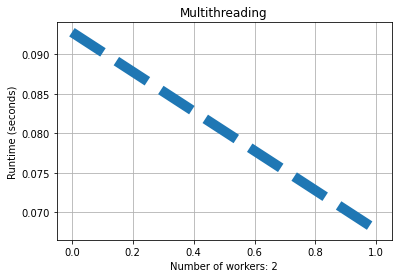

In [30]:
visualize_runtime(ExecutionTime2)

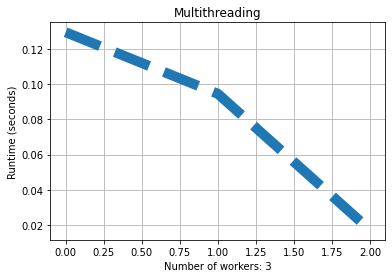

In [31]:
visualize_runtime(ExecutionTime3)

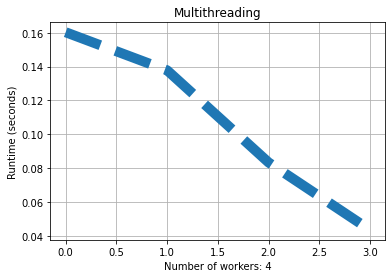

In [32]:
visualize_runtime(ExecutionTime4)

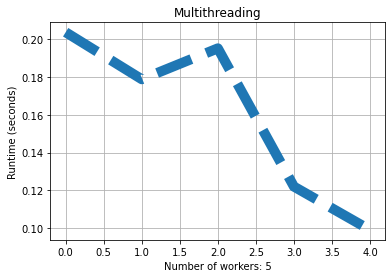

In [33]:
visualize_runtime(ExecutionTime5)

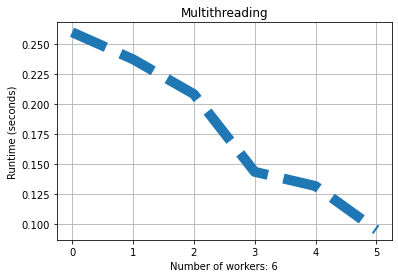

In [34]:
visualize_runtime(ExecutionTime6)

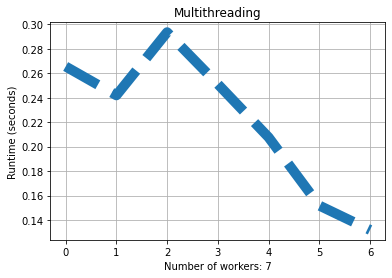

In [35]:
visualize_runtime(ExecutionTime7)

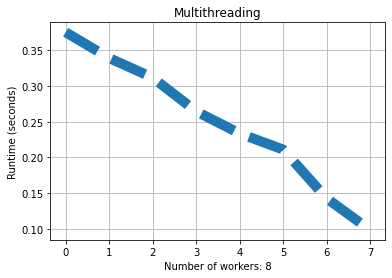

In [36]:
visualize_runtime(ExecutionTime8)